In [35]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import csv
cta = pd.read_csv('cta.csv')

Ridership Readme 
12-Aug-2011
Chicago Transit Authority

* About CTA ridership numbers *
Ridership statistics are provided on a system-wide and bus route/station-level basis. Ridership is primarily counted as boardings, that is, customers boarding a transit vehicle (bus or rail).  On the rail system, there is a distinction between station entries and total rides, or boardings. Datasets indicate such in their file name and description.

* How people are counted on the 'L' *
On the rail system, a customer is counted as an "entry" each time he or she passes through a turnstile to enter a station.  Customers are not counted as "entries" when they make a "cross-platform" transfer from one rail line to another, since they don't pass through a turnstile. Where the number given for rail is in "boardings," what's presented is a statistically valid estimate of the actual number of boardings onto the rail system. 

* "Daytype" *
Daytype fields in the data are coded as "W" for Weekday, "A" for Saturday and "U" for Sunday/Holidays. New Year's Day, Memorial Day, Independence Day, Labor Day, Thanksgiving, and Christmas Day are considered as "Sundays" for the purposes of ridership reporting.  All other holidays are reported as the type of day they fall on.

In [3]:
#the next few cells check the status of the data (shape, dtypes, nulls)
cta.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,01/01/2001,U,290
1,40020,Harlem-Lake,01/01/2001,U,633
2,40030,Pulaski-Lake,01/01/2001,U,483
3,40040,Quincy/Wells,01/01/2001,U,374
4,40050,Davis,01/01/2001,U,804


In [4]:
cta.shape

(809326, 5)

In [5]:
cta.dtypes

station_id      int64
stationname    object
date           object
daytype        object
rides           int64
dtype: object

In [6]:
cta.isnull().any()

station_id     False
stationname    False
date           False
daytype        False
rides          False
dtype: bool

In [7]:
#convert date to datetime object and append back to DF
cta['date'] =  pd.to_datetime(cta['date'])
print cta.date.min()
print cta.date.max()

2001-01-01 00:00:00
2016-07-31 00:00:00


In [8]:
#create columns for the date year, month, and day in order to perform later analyses
cta['year'] = pd.DatetimeIndex(cta['date']).year
cta['month'] = pd.DatetimeIndex(cta['date']).month
cta['day'] = pd.DatetimeIndex(cta['date']).day

In [9]:
#check value counts for daytype and create dummy variables and append them back to the DF
cta['daytype'].value_counts()

W    565419
U    128848
A    115059
Name: daytype, dtype: int64

In [10]:
#we have 3 data values, so we only need 2 to perform analyses
daytype_dummies = pd.get_dummies(cta.daytype, prefix='daytype').iloc[:,1:]
daytype_dummies.head()

,daytype_U,daytype_W
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [11]:
cta = pd.concat([cta, daytype_dummies], axis=1)

In [12]:
#check the head to view progress on shaping DF
cta.head()

,station_id,stationname,date,daytype,rides,year,month,day,daytype_U,daytype_W
0,40010,Austin-Forest Park,2001-01-01,U,290,2001,1,1,1,0
1,40020,Harlem-Lake,2001-01-01,U,633,2001,1,1,1,0
2,40030,Pulaski-Lake,2001-01-01,U,483,2001,1,1,1,0
3,40040,Quincy/Wells,2001-01-01,U,374,2001,1,1,1,0
4,40050,Davis,2001-01-01,U,804,2001,1,1,1,0


In [13]:
#begin performing EDA (Exploratory Data Analysis) on DF
cta.rides.describe()

count    809326.000000
mean       3275.253554
std        3144.853450
min           0.000000
25%        1112.000000
50%        2300.000000
75%        4329.000000
max       36323.000000
Name: rides, dtype: float64

In [14]:
#this shows the most trafficked stations
cta.groupby('stationname').rides.sum().sort_values(ascending=False).head(20)

stationname
Clark/Lake             77354165
Lake/State             74890089
Chicago/State          73393451
95th/Dan Ryan          61670926
Belmont-North Main     59193996
Fullerton              58244796
Grand/State            53239326
Jackson/State          51149734
O'Hare Airport         50716941
Roosevelt              47196141
State/Lake             43404106
Washington/Dearborn    42459774
Midway Airport         41649847
Addison-North Main     41276458
Monroe/State           40725386
79th                   37078344
Clark/Division         37030117
Adams/Wabash           35402203
Jackson/Dearborn       34348228
Randolph/Wabash        32485630
Name: rides, dtype: int64

In [15]:
annual_rides = pd.pivot_table(cta,index=['year'], values=['rides'], aggfunc='sum').reset_index()
annual_rides.head()

,year,rides
0,2001,151739502
1,2002,152364552
2,2003,150319580
3,2004,148312412
4,2005,154987157


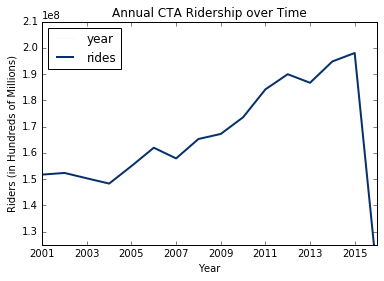

In [16]:
#This plot shows annual CTA ridership over time. We see a dropoff due to having only half of 2016's data.
ax = annual_rides.plot(lw=2,colormap='Blues', title='Annual CTA Ridership over Time')
ax.set_xlabel("Year")
ax.set_ylabel("Riders (in Hundreds of Millions)")
ax.set_xticklabels(range(2001, 2017, 2));
ax.set_ybound(lower=125000000, upper=210000000)

In [17]:
# I am pulling out just the 2015 data as an example of how I might explore data within a year
# to do more granular analysis on the time period closest to the decision to expand our business.
#Were I to have more time, I would do this for more than just this example year. I selected 2015 
#because it is the most recent full data year (2016 is partial)
cta_2015 = cta.loc[cta['year'] == 2015]

In [18]:
cta_2015.head()

,station_id,stationname,date,daytype,rides,year,month,day,daytype_U,daytype_W
726094,40010,Austin-Forest Park,2015-01-01,U,587,2015,1,1,1,0
726095,40010,Austin-Forest Park,2015-01-02,W,1386,2015,1,2,0,1
726096,40010,Austin-Forest Park,2015-01-03,A,785,2015,1,3,0,0
726097,40010,Austin-Forest Park,2015-01-04,U,625,2015,1,4,1,0
726098,40010,Austin-Forest Park,2015-01-05,W,1752,2015,1,5,0,1


In [19]:
# Shows the most trafficked stations for 
rides_2015 = pd.pivot_table(cta_2015,index=['stationname','year'],
                            values=['rides'], aggfunc='sum').reset_index()
rides_2015.sort_values('rides', ascending=False)

,stationname,year,rides
90,Lake/State,2015,7011372
43,Clark/Lake,2015,5997069
38,Chicago/State,2015,5262538
24,Belmont-North Main,2015,4353356
64,Grand/State,2015,4349630
60,Fullerton,2015,4233730
110,O'Hare Airport,2015,4053704
125,Roosevelt,2015,3816017
12,95th/Dan Ryan,2015,3676215
135,Washington/Dearborn,2015,3633658


In [20]:
#creating a pivot table listing the # of rides by station and year
rides_by_year = pd.pivot_table(cta,index=['stationname','year'], values=['rides'], aggfunc='sum').reset_index()
rides_by_year.head()

,stationname,year,rides
0,18th,2001,256183
1,18th,2002,251387
2,18th,2003,251773
3,18th,2004,236536
4,18th,2005,320783


In [21]:
#this creates a new column that contains the # of rides from the year prior, 
#shifted so the difference and trend can be shown
rides_by_year['prior_rides'] = rides_by_year['rides'].shift(1)
rides_by_year.head()

,stationname,year,rides,prior_rides
0,18th,2001,256183,NaN
1,18th,2002,251387,256183.0
2,18th,2003,251773,251387.0
3,18th,2004,236536,251773.0
4,18th,2005,320783,236536.0


In [22]:
#creates new column that shows how much a station's traffic increased or decreased from year x to year y
rides_by_year['increase_or_decrease'] = rides_by_year.rides - rides_by_year.prior_rides

In [23]:
rides_by_year

,stationname,year,rides,prior_rides,increase_or_decrease
0,18th,2001,256183,NaN,NaN
1,18th,2002,251387,256183.0,-4796.0
2,18th,2003,251773,251387.0,386.0
3,18th,2004,236536,251773.0,-15237.0
4,18th,2005,320783,236536.0,84247.0
5,18th,2006,360924,320783.0,40141.0
6,18th,2007,407087,360924.0,46163.0
7,18th,2008,466493,407087.0,59406.0
8,18th,2009,483374,466493.0,16881.0
9,18th,2010,505379,483374.0,22005.0


In [24]:
# All the 2001 years must be dropped because they will either be NaN (example see Row 1) 
# or compared to the wrong station. For example, see row 15 and #16 above. While not ideal to drop data, we still have 15 years of data
# and are elminating the oldest data in the df.
rides_by_year = rides_by_year[rides_by_year.year != 2001]

In [25]:
# Now we have a clean sub DF that shows us the station and if the traffic increased or decreased
rides_by_year.head()

,stationname,year,rides,prior_rides,increase_or_decrease
1,18th,2002,251387,256183.0,-4796.0
2,18th,2003,251773,251387.0,386.0
3,18th,2004,236536,251773.0,-15237.0
4,18th,2005,320783,236536.0,84247.0
5,18th,2006,360924,320783.0,40141.0


In [26]:
# This has created a new DF called "growing stations" which shows all stations that had an
# increase in ridership by more than 100,000 people. For the purposes of this challenge,
# I have also limited the output to years more recent than 2011. If I was looking to expand a business,
# I would want more recent data and see ridership trends from 2002 (for example) as less relevant.
growing_stations = rides_by_year.loc[((rides_by_year['increase_or_decrease'] >= 100000) & 
                                      (rides_by_year['year'] >=2011))]

In [27]:
growing_stations

,stationname,year,rides,prior_rides,increase_or_decrease
28,35-Bronzeville-IIT,2013,1230064,711259.0,518805.0
77,47th-Dan Ryan,2014,1038641,526057.0,512584.0
92,47th-South Elevated,2013,566165,433372.0,132793.0
141,63rd-Dan Ryan,2014,1127593,576490.0,551103.0
157,69th,2014,1800001,932660.0,867341.0
173,79th,2014,2418676,1243537.0,1175139.0
189,87th,2014,1506362,770551.0,735811.0
205,95th/Dan Ryan,2014,3669599,1996862.0,1672737.0
222,Adams/Wabash,2015,2788254,2131441.0,656813.0
254,Addison-North Main,2015,3034778,2884871.0,149907.0


In [28]:
growing_stations.stationname.value_counts()

Washington/Dearborn        5
Lake/State                 4
Rosemont                   4
Grand/State                4
Morse                      3
Western/Milwaukee          3
Clark/Lake                 3
Morgan-Lake                3
Merchandise Mart           3
Cermak-Chinatown           3
Monroe/Dearborn            3
Logan Square               3
Damen/Milwaukee            3
Chicago/State              3
O'Hare Airport             3
California/Milwaukee       3
State/Lake                 2
Roosevelt                  2
Harrison                   2
Dempster-Skokie            2
Washington/Wells           2
North/Clybourn             2
Division/Milwaukee         2
Argyle                     2
Chicago/Franklin           2
Randolph/Wabash            2
Belmont-North Main         2
Chicago/Milwaukee          2
Monroe/State               2
Fullerton                  2
                          ..
UIC-Halsted                1
69th                       1
Granville                  1
Lawrence      

In [33]:
# From the stations above, I will select any station that had an increase of 3 years or more. Further,
# from that, I will subset all stations that are not downtown. Rent is high and I am not looking to expand downtown.
# I also eliminated O'Hare Airport. This leaves me with a list of the following stations which will serve as my initial
# list of stations near which potential locations can be scouted.

# Rosemont                   4
# Morse                      3
# Western/Milwaukee          3
# Morgan-Lake                3
# Cermak-Chinatown           3
# Logan Square               3
# Damen/Milwaukee            3
# California/Milwaukee       3